In [1]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load libraries for scraping
import requests
from bs4 import BeautifulSoup

#For creating lists with same number repeating multiple times
from itertools import repeat

In [2]:
# First, we need to get the data from TransferMarket
# We need information about each club - namely their squad size, average age, foreign players, squad value, avg. player value,
# goal difference, points and position

#FIrst, we need to get the links for the pages containing all the years of info
# The years we need to get info for start from 2008 t0 2021

# Initialize a list that stores the links of each year
year_links = []

#Initialize a link that takes in the years 
year = []

#First, store all the links for each year in a list :

for i in range(2008,2022,1) :
    
    page = "https://www.transfermarkt.co.uk/premier-league/startseite/wettbewerb/GB1/plus/?saison_id=" + str(i)
    year_links.append(page)
    # Take in all the years in the year variable
    year.append(i)
#Check the list    
year_links

['https://www.transfermarkt.co.uk/premier-league/startseite/wettbewerb/GB1/plus/?saison_id=2008',
 'https://www.transfermarkt.co.uk/premier-league/startseite/wettbewerb/GB1/plus/?saison_id=2009',
 'https://www.transfermarkt.co.uk/premier-league/startseite/wettbewerb/GB1/plus/?saison_id=2010',
 'https://www.transfermarkt.co.uk/premier-league/startseite/wettbewerb/GB1/plus/?saison_id=2011',
 'https://www.transfermarkt.co.uk/premier-league/startseite/wettbewerb/GB1/plus/?saison_id=2012',
 'https://www.transfermarkt.co.uk/premier-league/startseite/wettbewerb/GB1/plus/?saison_id=2013',
 'https://www.transfermarkt.co.uk/premier-league/startseite/wettbewerb/GB1/plus/?saison_id=2014',
 'https://www.transfermarkt.co.uk/premier-league/startseite/wettbewerb/GB1/plus/?saison_id=2015',
 'https://www.transfermarkt.co.uk/premier-league/startseite/wettbewerb/GB1/plus/?saison_id=2016',
 'https://www.transfermarkt.co.uk/premier-league/startseite/wettbewerb/GB1/plus/?saison_id=2017',
 'https://www.transf

In [131]:
# Next, run a loop through each of the links, scraping the necessary info from each page, and storing those in variables

#First, define the user agent so that the page knows that we are not a bot
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36"}

# Initialize variables that can take in the values
season = []
team = []
squad = []
Average_age = []
Foreign_players = []
Squad_value = []
Avg_player_value = []

# Next, run a loop to scrape data through each page and get the info

for z in range(len(year_links)) :
    
    # Season is the first variable that needs to be populated with repeating values
    season.extend(repeat(year[z],20))
    #Take in the year
    page = year_links[z]
    
    #Send a request to that page
    res = requests.get(page,headers = headers)
    
    #Get the content of the webpage in the form of an html script after scraping
    soup = BeautifulSoup(res.content,"html.parser")
    
    #######################################################################################################################
    # Get the class pertaining to the NAME OF THE CLUB -- CHECKED
    a = soup.find_all("a",{"class" : "vereinprofil_tooltip"})
    
    #We now have all the info enclosed within the a tag, that houses the name of all the clubs in those seasons
    # The club names are enclosed in specific locations within a i.e. in every 3 alternating indices within a, i.e. a[0],a[3],a[6] etc
    
    #Running a loop to iterate through these locations and extracting the text from the alt tag
    for j in range(2,60,3) :
    
    #For every 3rd location within the object a, select the image tag, and within that, the alt attribute 
    #This gives us the club names each season
        team.append(a[j].text)
        
    #######################################################################################################################    
    # Next, we need the SQUAD SIZE -- CHECKED
    b = soup.find_all("td",{"class" : "zentriert"})
    
    #b contains the tags with the squad sizes. On digging deeper, it is found that they start from the fourth position, 
    # and are in multiples of 4
        
    for k in range(4,84,4) :
        squad.append(b[k].text)
    
    #######################################################################################################################
    # Next, we need the AVG AGE -- CHECKED
    c = soup.find_all("td",{"class" : "zentriert"})
    
    #c contains the tags with the Average ages. On digging deeper, it is found that they start from the fifth position, 
    # and are in multiples of 4
        
    for l in range(5,85,4) :
        Average_age.append(c[l].text)
        
    #######################################################################################################################    
    # Next, we need the FOREIGNER COUNTS -- CHECKED
    d = soup.find_all("td",{"class" : "zentriert"})
    
    #d contains the tags with the Foreigner counts. On digging deeper, it is found that they start from the sixth position, 
    # and are in multiples of 4
        
    for m in range(6,86,4) :
        Foreign_players.append(d[m].text)
    
    #######################################################################################################################
    # Next, we need to get the SQUAD VALUE -- CHECKED
    e = soup.find_all("td",{"class" : "rechts"})
    
    #e contains the tags with the squad values. On digging deeper, it is found that they start from the 4th position, 
    # and are in multiples of 4
        
    for n in range(4,81,4) :
        Squad_value.append(e[n].text.split("£")[1].split("m")[0])    
        
    #######################################################################################################################    
    # Next, we need to get the AVG PLAYER VALUE -- CHECKED
    f = soup.find_all("td",{"class" : "rechts"})
    
    #c contains the tags with the Average Player value. On digging deeper, it is found that they start from the fifth position, 
    # and are in multiples of 4
        
    for o in range(5,84,4) :
        Avg_player_value.append(f[o].text.split("£")[1].split("m")[0])
        
        
       

In [132]:
# Create a dataframe combining all these columns
final_df = pd.DataFrame({"Season" : season,
                        "Team" : team,
                        "Squad size" : squad,
                        "Avg Squad age" : Average_age,
                        "Foreign Players" : Foreign_players,
                        "Squad Net Value" : Squad_value,
                        "Avg Player Value" :Avg_player_value})

In [135]:
# CHeck the dataframe
pd.set_option('display.max_rows', None) 
#Checking if there are any null values
final_df.isnull().sum()

Season              0
Team                0
Squad size          0
Avg Squad age       0
Foreign Players     0
Squad Net Value     0
Avg Player Value    0
dtype: int64

In [282]:
# There are three columns that we will pull separately, namely GD, points and League position, simply cuz they are not
# in the same order as the data we pulled above

#Initializing the lists
season_new = []
team_new = []
Goal_difference = []
Points = []
Position = []

# The year 2020 has these values at different locations in their tags. We will pull it separately for them

for y in range(0,12) :
    
    # Season is the first variable that needs to be populated with repeating values
    season_new.extend(repeat(year[y],20))
    
    #Next, Take in the year
    page = year_links[y]
    
    #Send a request to that page
    res = requests.get(page,headers = headers)
    
    #Get the content of the webpage in the form of an html script after scraping
    soup = BeautifulSoup(res.content,"html.parser")
    
    ###############################################################################
    # Get the team name
    #Now, turns out that the team name does not start from the same position within the <a> tag.
    #So after finding the different positions, use those in the various if conditions
    name = soup.find_all("a",{"class" : "vereinprofil_tooltip"})
    
    if name[146].text != "" :
        for j in range(146,185,2) :
            team_new.append(name[j].text)
    elif name[145].text != "" :            
        for j in range(145,184,2) :
            team_new.append(name[j].text)
    elif name[193].text != "" :
        for j in range(193,232,2) :
            team_new.append(name[j].text)
    else :
        break
        
    ###############################################################################    
    
    # Get the Goal Difference
    gd = soup.find_all("td",{"class" : "zentriert"})
    
    #Run a loop to get the goal difference
    for k in range(125,203,4) :
        Goal_difference.append(gd[k].text)
    
    ###############################################################################  
    
    # Get the Points    
    #Run a loop to get the Points. You can use the gd object itself
    for l in range(126,203,4) :
        Points.append(gd[l].text)
    
    ###############################################################################  
    
     # Get the league position
    lp = soup.find_all("td",{"class" : "rechts hauptlink nowrap"})
    
    #Run a loop to get the league position
    for m in range(0,20) :
        Position.append(lp[m].text.split("\xa0")[0])

In [294]:
# For 2020

ye = 2020
    
# Season is the first variable that needs to be populated with repeating values
season_new.extend(repeat(ye,20))
    
#Next, Take in the year
page = 'https://www.transfermarkt.co.uk/premier-league/startseite/wettbewerb/GB1/plus/?saison_id=2020'
    
#Send a request to that page
res = requests.get(page,headers = headers)
    
#Get the content of the webpage in the form of an html script after scraping
soup = BeautifulSoup(res.content,"html.parser")
    
###############################################################################
# Get the team name
name = soup.find_all("a",{"class" : "vereinprofil_tooltip"})
    
for j in range(193,232,2) :
            team_new.append(name[j].text)
        
###############################################################################    
    
# Get the Goal Difference
gd = soup.find_all("td",{"class" : "zentriert"})
    
#Run a loop to get the goal difference
for k in range(145,222,4) :
        Goal_difference.append(gd[k].text)
    
###############################################################################  
    
# Get the Points    
#Run a loop to get the Points. You can use the gd object itself
for l in range(146,223,4) :
    Points.append(gd[l].text)
    
###############################################################################  
    
# Get the league position
lp = soup.find_all("td",{"class" : "rechts hauptlink nowrap"})
    
#Run a loop to get the league position
for m in range(0,20) :
    Position.append(lp[m].text.split("\xa0")[0])

In [295]:
# Create a dataframe combining all these columns
second_df = pd.DataFrame({"Season" : season_new,
                        "Team" : team_new,
                        "GD" : Goal_difference,
                        "Points" : Points,
                        "Position" : Position})

In [296]:
# Lets view this dataframe
second_df

,Season,Team,GD,Points,Position
0,2008,Man Utd,44,90,1
1,2008,Liverpool,50,86,2
2,2008,Chelsea,44,83,3
3,2008,Arsenal,31,72,4
4,2008,Everton,18,63,5
5,2008,Aston Villa,6,62,6
6,2008,Fulham,5,53,7
7,2008,Spurs,0,51,8
8,2008,West Ham,-3,51,9
9,2008,Man City,8,50,10


In [297]:
#Joining the two dataframes together
df = pd.merge(final_df,second_df,how = "left",on = ["Season","Team"])
df

,Season,Team,Squad size,Avg Squad age,Foreign Players,Squad Net Value,Avg Player Value,GD,Points,Position
0,2008,Chelsea,28,25.6,21,363.78,12.99,44,83,3
1,2008,Man Utd,31,24.3,20,320.49,10.34,44,90,1
2,2008,Liverpool,28,23.9,24,229.25,8.19,50,86,2
3,2008,Arsenal,38,21.3,30,225.77,5.94,31,72,4
4,2008,Spurs,35,22.5,18,191.34,5.47,0,51,8
5,2008,Man City,32,24.0,20,184.77,5.77,8,50,10
6,2008,Everton,28,24.4,15,146.30,5.22,18,63,5
7,2008,Newcastle,32,24.8,19,121.46,3.80,-19,34,18
8,2008,Portsmouth,31,26.8,19,118.35,3.82,-19,41,14
9,2008,Aston Villa,21,25.4,8,100.62,4.79,6,62,6


In [303]:
# Eliminating the 2021 records
df_data = df[df["Season"] != 2021]
len(df_data)

# There is one record within the Squad value column which does not have a pure number (its 1.15 bn) - Row 220
df_data.iloc[220,5] = (df_data.iloc[220,5].split("bn")[0])

In [304]:
#Viewing the df
df_data

,Season,Team,Squad size,Avg Squad age,Foreign Players,Squad Net Value,Avg Player Value,GD,Points,Position
0,2008,Chelsea,28,25.6,21,363.78,12.99,44,83,3
1,2008,Man Utd,31,24.3,20,320.49,10.34,44,90,1
2,2008,Liverpool,28,23.9,24,229.25,8.19,50,86,2
3,2008,Arsenal,38,21.3,30,225.77,5.94,31,72,4
4,2008,Spurs,35,22.5,18,191.34,5.47,0,51,8
5,2008,Man City,32,24.0,20,184.77,5.77,8,50,10
6,2008,Everton,28,24.4,15,146.30,5.22,18,63,5
7,2008,Newcastle,32,24.8,19,121.46,3.80,-19,34,18
8,2008,Portsmouth,31,26.8,19,118.35,3.82,-19,41,14
9,2008,Aston Villa,21,25.4,8,100.62,4.79,6,62,6


In [319]:
# We want to create a linear regression model that predicts what defines winning.
# We are going to use the Squad net value to predict winning
# There are two variables that can be predicted for here, points or league position
# To decide which of the two, we are going to calculate the correlation of squad value with points and league postion

# Converting the points, Position and squad value column into integers
df_data["Squad Net Value"] = df_data["Squad Net Value"].astype(float)
df_data["Points"] = df_data["Points"].astype(str).astype(int)
df_data["Position"] = df_data["Position"].astype(int)
df_data["Position"] = df_data["Position"].astype(int)

# Multiplying Man City's value to 1000 
df_data.iloc[220,5] = df_data.iloc[220,5] * 1000

C:\Users\sfern\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\sfern\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sfern\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [320]:
#Viewing the datatypes of the objects
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 259
Data columns (total 10 columns):
Season              260 non-null int64
Team                260 non-null object
Squad size          260 non-null object
Avg Squad age       260 non-null object
Foreign Players     260 non-null object
Squad Net Value     260 non-null float64
Avg Player Value    260 non-null object
GD                  260 non-null object
Points              260 non-null int32
Position            260 non-null int32
dtypes: float64(1), int32(2), int64(1), object(6)
memory usage: 30.3+ KB


In [340]:
# Lets check the correlation of the Squad value with each of these columns
abs(df_data.corr())

#Looks like Squad Net Value is better correlated with Points than League Position. SO lets use that

,Season,Squad Net Value,Points,Position
Season,1.000000,0.430757,0.007683,0.000000
Squad Net Value,0.430757,1.000000,0.676641,0.632604
Points,0.007683,0.676641,1.000000,0.950178
Position,0.000000,0.632604,0.950178,1.000000


In [ ]:
# Now, Squad value spans 12 years.
# A 100M spent in 2010 is different from a 100M spent in 2020
# So, we need to normalize the Squad value in relation to the highest spend in that year

In [325]:
# Creating a list to store these new values
Relativevalue = []

#Calculate the relative squad value for each row wrt the highest
season_iter = []

In [356]:
# Calculate the maximum squad value every season
max_squad = pd.DataFrame(df_data.groupby("Season").describe()["Squad Net Value"]["max"])

#Join this with the original dataframe
df_fin = pd.merge(df_data,max_squad,how = "left", on = ["Season"])

,Season,Team,Squad size,Avg Squad age,Foreign Players,Squad Net Value,Avg Player Value,GD,Points,Position,max
0,2008,Chelsea,28,25.6,21,363.78,12.99,44,83,3,363.78
1,2008,Man Utd,31,24.3,20,320.49,10.34,44,90,1,363.78
2,2008,Liverpool,28,23.9,24,229.25,8.19,50,86,2,363.78
3,2008,Arsenal,38,21.3,30,225.77,5.94,31,72,4,363.78
4,2008,Spurs,35,22.5,18,191.34,5.47,0,51,8,363.78
5,2008,Man City,32,24.0,20,184.77,5.77,8,50,10,363.78
6,2008,Everton,28,24.4,15,146.30,5.22,18,63,5,363.78
7,2008,Newcastle,32,24.8,19,121.46,3.80,-19,34,18,363.78
8,2008,Portsmouth,31,26.8,19,118.35,3.82,-19,41,14,363.78
9,2008,Aston Villa,21,25.4,8,100.62,4.79,6,62,6,363.78


In [358]:
#Now we can divide each rows Squad value with the maximum value to get the relative values
df_fin["Relative value"] = df_fin["Squad Net Value"]/df_fin["max"]
df_fin

,Season,Team,Squad size,Avg Squad age,Foreign Players,Squad Net Value,Avg Player Value,GD,Points,Position,max,Relative value
0,2008,Chelsea,28,25.6,21,363.78,12.99,44,83,3,363.78,1.000000
1,2008,Man Utd,31,24.3,20,320.49,10.34,44,90,1,363.78,0.881000
2,2008,Liverpool,28,23.9,24,229.25,8.19,50,86,2,363.78,0.630189
3,2008,Arsenal,38,21.3,30,225.77,5.94,31,72,4,363.78,0.620622
4,2008,Spurs,35,22.5,18,191.34,5.47,0,51,8,363.78,0.525977
5,2008,Man City,32,24.0,20,184.77,5.77,8,50,10,363.78,0.507917
6,2008,Everton,28,24.4,15,146.30,5.22,18,63,5,363.78,0.402166
7,2008,Newcastle,32,24.8,19,121.46,3.80,-19,34,18,363.78,0.333883
8,2008,Portsmouth,31,26.8,19,118.35,3.82,-19,41,14,363.78,0.325334
9,2008,Aston Villa,21,25.4,8,100.62,4.79,6,62,6,363.78,0.276596


In [355]:
# Lets again check the correlation between Relative value and Points
df_fin.corr()

# Very strong correlation seen between the two

,Season,Squad Net Value,Points,Position,max,Relative value
Season,1.000000,0.430757,0.007683,0.000000e+00,8.576723e-01,0.044569
Squad Net Value,0.430757,1.000000,0.676641,-6.326039e-01,4.665914e-01,0.827384
Points,0.007683,0.676641,1.000000,-9.501784e-01,9.455344e-03,0.812898
Position,0.000000,-0.632604,-0.950178,1.000000e+00,-8.863219e-18,-0.765465
max,0.857672,0.466591,0.009455,-8.863219e-18,1.000000e+00,0.010788
Relative value,0.044569,0.827384,0.812898,-7.654655e-01,1.078785e-02,1.000000


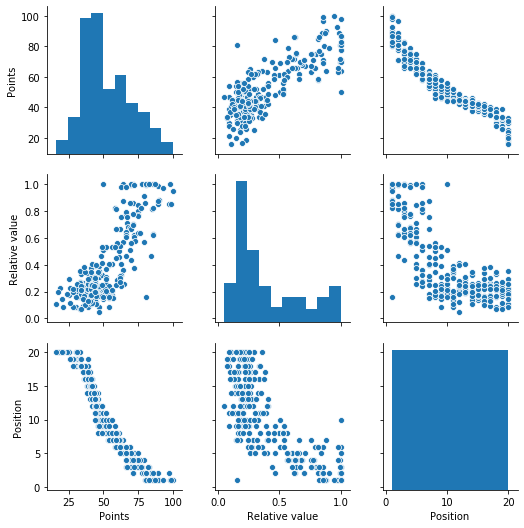

In [363]:
# Viewing the relation between the variables in the dataframe
import seaborn as sns
sns.pairplot(df_fin[["Points","Relative value","Position"]])

# Building the model

In [388]:
# Assign the columns for modelling
X = df_fin["Relative value"]
Y = df_fin["Points"]

#Reshape them
X = X.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)

#Create training and test sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 101)

#Create an empty model\
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [395]:
# Lets examine the LM model
coefficient = lm.coef_
intercept = lm.intercept_

print(coefficient,intercept)

[[53.30637222]] [30.66458322]


In [398]:
# SO the equation is Points = 30.66 + 53.30 * X (where X is the squad value in % terms of the highest team)

#So, if we choose to spend even 50% of the highest squad value i.e. 0.5
x = 0.5
y = intercept + (coefficient * x)
y 
# So, having the highest squad value guarantees you atleast 57 points, enough to get you into the top half

array([[57.31776933]])

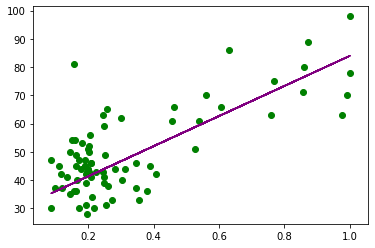

In [403]:
#Lets make some predictions
predictions = lm.predict(X_test)

#Lets plot them
import matplotlib.pyplot as plt
plt.scatter(X_test,Y_test,color = "green")

#Lets plot the predictions on this
plt.plot(X_test,predictions,color = "purple")

In [ ]:
# So for every 10% that you are off of the most expensive team, our model suggests that you should expect to drop 5.3 points.

In [406]:
# Lets calculate the MAE
error = metrics.mean_absolute_error(Y_test,predictions)
error

8.135717703472265

In [407]:
#How to get the predictions in the dataset
pred = pd.DataFrame({"Actual" : Y_test.flatten(),
                      "Predicted" : predictions.flatten()})
pred

,Actual,Predicted
0,51,41.288345
1,50,41.508389
2,65,44.407048
3,39,43.934868
4,54,38.611900
5,66,63.004400
6,80,76.563236
7,44,47.242878
8,31,44.244402
9,33,49.656488
